In [1]:
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import random
import math
from nltk.tokenize import word_tokenize
from collections import Counter


f = open('../../data/tom_sawyer.txt')
l = f.readlines()

stopWords = ['.', ',', '!', '?', '-', ';', '_']
#stop words used for cleaning, this is may cause the number of tokens and types to change


def lineCorrector(l):
    p = l[:-2]
    if len(p) > 0:
        return p
lines_ = map(lineCorrector, l)
lines = []
for i in lines_:
    if i != None:
        lines.append(i)

lines = lines[252:]
#starting of the actual text of the story

data = ' '.join(lines).decode('utf-8')
textInWords = [i for i in word_tokenize(data.lower()) if i not in stopWords]
count = Counter(textInWords)
wordFrequencies = sorted(count.values(), reverse=True)


sortedTypes =  sorted(count.items(), key=lambda i: i[1], reverse=True)
tokens = word_tokenize(data.lower())
types = [ sortedTypes[j][0] for j in xrange(len(sortedTypes)) ]
Ranks = []

noOfTokens = float(len(tokens))
noOfTypes = float(len(types))
TTR = noOfTypes/noOfTokens

noOfTokens

for i in xrange(int(noOfTypes)):
    if i == 0:
        Ranks.append(i+1)
    else:
        if wordFrequencies[i-1] == wordFrequencies[i]:
            Ranks.append(Ranks[-1])
        else:
            Ranks.append(Ranks[-1]+1)


In [2]:
noOfTypes

8239.0

In [3]:
TTR

0.09150174363075009

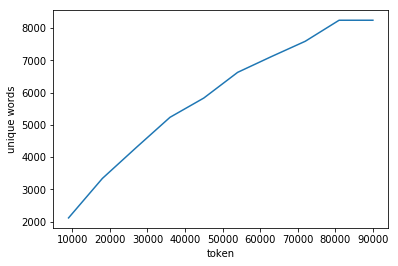

In [4]:
dataPoints_x = []
dataPoints_y = []
for i in xrange(10):
    splitList = textInWords[0: (i+1)*9000]
    uniqueWords = len(list(set(splitList)))
    dataPoints_x.append(uniqueWords)
    dataPoints_y.append((i+1)*9000)
    
for i in xrange(int(noOfTypes)):
    if i == 0:
        Ranks.append(i+1)
    else:
        if wordFrequencies[i-1] == wordFrequencies[i]:
            Ranks.append(Ranks[-1])
        else:
            Ranks.append(Ranks[-1]+1)

    
plt.plot(dataPoints_y, dataPoints_x)
plt.xlabel("token")
plt.ylabel("unique words")
plt.show()

#the following plot is for showing heapsLaw which is if the form V = KN^b, where V is the vocabulary, ie,
#the number of unique words and N is the number of tokens. b and N and are constants

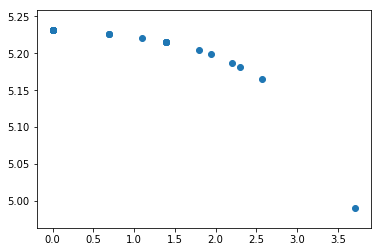

In [5]:
randints = sorted([random.randint(0, 8000) for i in xrange(30)])
testWords = [ textInWords[randints[i]] for i in xrange(30)]
wordRanks = [ Ranks[randints[i]] for i in xrange(30)]

noOfWordMeanings = [ len(wn.synsets(testWords[i])) for i in xrange(30)]
wordLength = [ len(testWords[i]) for i in xrange(30)]
wordFrequencies = [ wordFrequencies[randints[i]] for i in xrange(30)]

logOfWordRanks = []
logOfWordFrequencies = []
logOfWordLength = []
logWordMeanings = []

for i in xrange(30):
    if noOfWordMeanings[i] == 0:
        noOfWordMeanings[i] = 1
    logOfWordFrequencies.append(math.log(float(wordFrequencies[i])))
    logOfWordLength.append(math.log(float(wordLength[i])))
    logOfWordRanks.append(math.log(float(wordRanks[i])))
    logWordMeanings.append(math.log(float(noOfWordMeanings[i])))
    
    
    


plt.scatter(logOfWordFrequencies, logOfWordRanks)
plt.xlabel("log(word frequencies)")
plt.ylabel("log(word ranks)")
plt.show()

#This is the plot of the original Zipf law, it is a log(f) vs log(r) graph. This should be a straight line because 
# of the proportionality with a negative slope. 

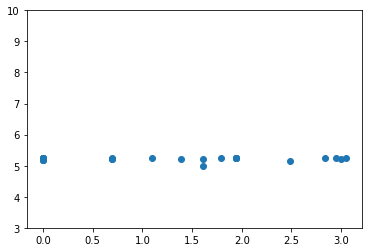

In [6]:
plt.scatter(logWordMeanings,logOfWordRanks)
plt.ylim((3,10))
plt.xlabel("log(word meanings)")
plt.ylabel("log(word ranks)")
plt.show()

#this plot is log(m) VS log(r) which should be a straight line as the values are proportional to each other

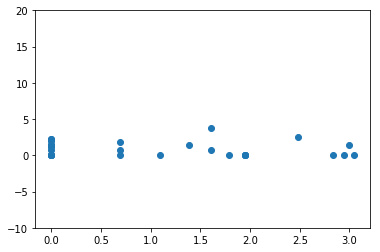

In [7]:
plt.scatter(logWordMeanings, logOfWordFrequencies)
plt.ylim((-10,20))
plt.xlabel("log(word meanings)")
plt.ylabel("log(word frequencies)")
plt.show()

#this plot is log(m) VS log(f) which should be a straight line as the values are proportional to each other

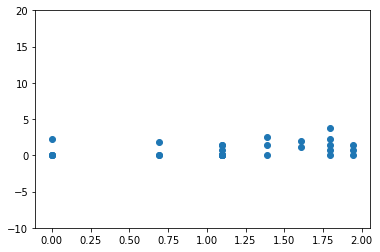

In [8]:
plt.scatter(logOfWordLength, logOfWordFrequencies)
plt.ylim((-10,20))
plt.xlabel("log(word length)")
plt.ylabel("log(word frequencies)")
plt.show()

#this plot is log(l) VS 0.5log(f) which should be straight line as l is proportional to sqrt(f) with positive slope

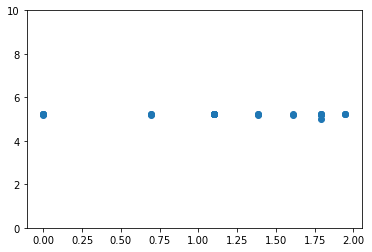

In [9]:
plt.scatter(logOfWordLength, logOfWordRanks)
plt.ylim((0,10))
plt.xlabel("log(word length)")
plt.ylabel("log(word rank)")
plt.show()

#this plot is log(l) VS 0.5log(r) which should be straight line as l is inversly proportional to sqrt(r) with negative slope

In [10]:
lVSf = [ wordFrequencies[i]*wordLength[i] for i in xrange(30)]
lVSr = [ float(wordLength[i])/wordRanks[i] for i in xrange(30)]
mVSf = [ math.sqrt(wordFrequencies[i])/float(noOfWordMeanings[i]) for i in xrange(30)]
mVSr = [ math.sqrt(wordRanks[i])*float(noOfWordMeanings[i]) for i in xrange(30)]

lVSf

#the product of l and f should be constant for the proportionality 

[246,
 52,
 60,
 9,
 35,
 12,
 28,
 16,
 24,
 12,
 12,
 15,
 12,
 6,
 14,
 1,
 2,
 3,
 3,
 6,
 7,
 4,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 3]

In [11]:
lVSr

#the division of l and r should be constant because of the proportionality

[0.04081632653061224,
 0.022857142857142857,
 0.033707865168539325,
 0.00558659217877095,
 0.027624309392265192,
 0.01098901098901099,
 0.03804347826086957,
 0.021739130434782608,
 0.03260869565217391,
 0.016304347826086956,
 0.016304347826086956,
 0.02702702702702703,
 0.03225806451612903,
 0.016129032258064516,
 0.03763440860215054,
 0.0053475935828877,
 0.0106951871657754,
 0.016042780748663103,
 0.016042780748663103,
 0.03208556149732621,
 0.0374331550802139,
 0.0213903743315508,
 0.0053475935828877,
 0.0106951871657754,
 0.016042780748663103,
 0.016042780748663103,
 0.016042780748663103,
 0.0053475935828877,
 0.0053475935828877,
 0.016042780748663103]

In [12]:
mVSf

#the division of sqrt(f) and m must be constant because of the proportionality 

[1.2806248474865698,
 0.3004626062886658,
 3.1622776601683795,
 3.0,
 2.6457513110645907,
 1.224744871391589,
 0.1,
 2.0,
 2.0,
 0.5,
 2.0,
 1.7320508075688772,
 0.282842712474619,
 1.4142135623730951,
 0.7071067811865476,
 0.14285714285714285,
 1.0,
 1.0,
 1.0,
 0.16666666666666666,
 0.058823529411764705,
 0.047619047619047616,
 0.14285714285714285,
 0.5,
 0.3333333333333333,
 0.05263157894736842,
 1.0,
 0.14285714285714285,
 0.14285714285714285,
 1.0]

In [13]:
mVSr

#the product of sqrt(r) and m must be constant because of the proportionality

[60.6217782649107,
 158.74507866387543,
 13.341664064126334,
 13.379088160259652,
 13.45362404707371,
 26.981475126464083,
 271.29319932501073,
 13.564659966250536,
 13.564659966250536,
 54.258639865002145,
 13.564659966250536,
 13.601470508735444,
 68.19090848492928,
 13.638181696985855,
 27.27636339397171,
 95.72356031824141,
 13.674794331177344,
 13.674794331177344,
 13.674794331177344,
 82.04876598706406,
 232.47150363001484,
 287.1706809547242,
 95.72356031824141,
 27.349588662354687,
 41.02438299353203,
 259.82109229236954,
 13.674794331177344,
 95.72356031824141,
 95.72356031824141,
 13.674794331177344]